In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [4]:
img = cv2.imread('testing/veinss.jpg',0)

kernel = np.ones((5,5), np.uint8)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(7,7))
cl1 = clahe.apply(img)

In [5]:
#apply adaptive threshold
cl2 = cv2.medianBlur(cl1, 5)
th1 = cv2.adaptiveThreshold(cl2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,25,2.55)

#apply otsu threshold
blur = cv2.GaussianBlur(cl1,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#removing noise 
th2 = th1 & th3

In [7]:
#morphological transform
opening = cv2.morphologyEx(th2, cv2.MORPH_OPEN, kernel)

#finding outlines via contouring process
contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
img1 = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) 
dst = cv2.drawContours(img1, contours, -1, (0,255,0), -1)

#printing the results onto the screen
cv2.imwrite("Results/out.jpg", dst)

True

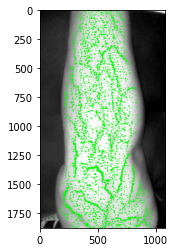

In [11]:
a=plt.imread('Results/out.jpg')
plt.imshow(a)